In [1]:
import numpy as np
import pandas as pd

In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc

In [3]:

def get_mae(model):
    train_pred = model.predict(X_train)
    score = mean_absolute_error(y_train,train_pred)
    print(model.__class__.__name__, " train MAE: ", np.round(score,3))
    pred = model.predict(X_test)
    score = mean_absolute_error(y_test,pred)
    print(model.__class__.__name__, " MAE: ", np.round(score,3))


In [4]:
def get_maes(models):
    scores = []
    for model in models:
        score = get_mae(model)
        # scores.append(score)
    # return scores

In [5]:

def get_r2score(model):
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    train_score = r2_score(y_train,train_pred)
    score = r2_score(y_test,pred)
    print(model.__class__.__name__, " train_R2SCORE: ", np.round(train_score,3))
    print(model.__class__.__name__, " R2SCORE: ", np.round(score,3))

In [6]:
def get_rmse(model):
    train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train,train_pred)
    rmse = np.sqrt(train_mse)
    print(model.__class__.__name__, 'train RMSE: ', np.round(rmse,3))
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [7]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        # rmses.append(rmse)
    # return rmses

In [8]:
def get_r2scores(models):
    scores = []
    for model in models:
        score = get_r2score(model)
        # scores.append(score)
    # return scores

In [9]:
# Preprocessing for turn over rate
def tor_preprocessing(tor):
  tor_df = tor
  tor_val = tor_df['turn_over_rate']

  for i, val in enumerate(tor_val):
    if '정보' in val:
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif val == '(9999%)' :
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif '(' in val:
      tmp = float(val[1:-1].replace('%',''))*0.01
      tor_df.loc[i,'turn_over_rate'] = tmp

  return tor_df

In [10]:
# Preprocessing for financial variable
def fv_preprocessing(fv):
  fv_df = fv
  afv = fv_df['average_salary']
  tfv = fv_df['total_sale']

  for i, val in enumerate(afv):
    if type(val) == str:
        if '만원' in val:
          tmp = int(val[:-2].replace(',',''))
          fv_df.loc[i,'average_salary'] = tmp
        if '회사' in val:
          fv_df.loc[i,'average_salary'] = np.NAN
        if '수집' in val:
          fv_df.loc[i,'average_salary'] = np.NAN

  for i, val in enumerate(tfv):
    if type(val) == str:
        if '조원' in val:
          tmp = float(val[:-2].replace(',',''))*1000
          fv_df.loc[i,'total_sale'] = tmp
        if '억원' in val:
          tmp = float(val[:-2].replace(',',''))
          fv_df.loc[i,'total_sale'] = tmp
        if '억' in val:
          tmp = float(val[:-1].replace(',',''))
          fv_df.loc[i,'total_sale'] = tmp
          print(fv_df.loc[i,'total_sale'])
          print(i)
        if '회사' in val:
          fv_df.loc[i,'total_sale'] = np.NAN

  return fv_df

In [11]:
combined_data = pd.read_csv("/content/drive/MyDrive/bow_df.csv")


In [12]:

from sklearn.model_selection import train_test_split
combined_data = combined_data[combined_data['turn_over_rate']<1]
error_firm = ['동원홈푸드','휠라홀딩스','트리','와디즈','키위컴퍼니','줌인터넷','시선인터내셔널','브이티코스메틱','유니슨이테크','씨엠비대전방송','서울비젼','더메인즈','조은시스템']
for i in error_firm:
    combined_data = combined_data[combined_data.company_name != i]
combined_data.dropna(axis=0, inplace=True)
combined_data = combined_data.drop(['Unnamed: 0'], axis=1)
combined_data = fv_preprocessing(combined_data)
tor = combined_data['turn_over_rate']
combined_data.drop('turn_over_rate', axis=1, inplace=True)


In [13]:
combined_data = combined_data.drop(['company_name'], axis = 1, inplace = False)

In [14]:
train_input, test_input, train_target, test_target = train_test_split(combined_data, tor, test_size=0.2)

In [15]:
train_input

,adv,dadv,average_salary,total_sale
1760,연차를 비교적 자유롭게 쓸수있음부서마다 차이가있겠지만 같이 일하는 직원들이 다 성격...,자잘한 회의가 많아서 일이바쁠때는 업무시간이 부족함인수인계가 체계적이지는않아서 초반...,3857,227.7
2403,팀마다 분위기는 다르지만 눈치없이 쓸수 있음 ( 팀마다 천차만별)연봉이 곧 복지다 ...,"복지가 없음.뭐 명절 전 일찍 퇴근 이런거 하나도 없고, 복장도 신경써야하고유연근무...",5812,221.9
950,서로 터치 안하는 분위기였던것 같음. 다들 자기 할일에 집중하고 서로 나름 친하게 ...,처음 들어가면 노가다성 문항분류 일을 하게 되는것 같은데 난 그 일을 알바로 잠깐 ...,4095,188.3
18,"연차를 눈치 안 보고 마음대로 쓸 수 있음, 연차 사유 적지 않음, 5시까지 일함,...",알바는 단점 없습니다 알바라서 커리어에 도움 안된다는거 딱 한가지 그리고 지인 추천...,10001,13000.0
24,워라밸이 보장된다새 건물이라 근무환경이 좋다.복지가 좋다. 돈 많이 주고 무난하다그...,타 금융회사와 마찬가지로 비전이 없다.프로세싱 본업의 포션이 줄고 있다. 갈수록 줄...,10852,3500.0
...,...,...,...,...
446,같이 일하는 사람들이 좋음.. 그뿐임.. 다른분들도 회사의 장점을 말하면 동료라고 ...,"비효율적인 업무보고, 퇴사자들이 매분기마다 있어서 분위기가 자꾸 잡혀지지않음, 잦은...",3167,41.6
2028,"칼퇴하는 문화, 그마저도 곱게 보지 않아 사라지는 느낌 1. 칼퇴 지향2. 오후 3...","디자인을 볼줄아는 선임이 없음, 디자인 발전에 고민을 하지 않음, 컨셉이 필요하지 ...",4232,107.3
1423,포괄임금제 없음교육의 기회가 많으며 정년까지 보장된 회사 생활 친구들이나 경력직들과...,대산이라는 지역 적응하긴 어려우나 그래도 나름 서울이랑 가깝긴함7-4제 시행 사람마...,6082,9800.0
1325,"월급은 밀린적이 단 한번도 없음, 나름 자율적인 분위기에서 업무 수행가능 팀원간에는...","단순 보고를 위한 미팅 및 보고서 작성이 많음, 퇴근시간에 대해 눈치가 많이 보임 ...",5430,1390.1


In [16]:
test_input

,adv,dadv,average_salary,total_sale
2358,"큰 업무역량이 필요 없음, 가만히 서있으면 되는 흔한 보안업 생각하면 된다. 보너스...",미래의 불안정 회사내규 그리고 고객사 겉은 번지지르르하지만 워라벨이 없고 휴무보장이...,5255,1788.3
2018,전체적으로 타이트하지는 않음. 그래서 주니어들에게는 더더욱 피해야 할 회사. 시니어...,"체계가 없음.팀의 구분도 정확하지 않고, 타팀의 업무를 그냥 만만한 팀이 짬처리 받...",2985,86.4
1317,"- 서울사무소 기준 4.5일 근무가 최대장점임 ,매주 금요일 오전만 근무해서 오후에...",- 자체 그룹웨어를 쓰는데 어려워서 익숙해지는데 시간걸림- 경력직 입사자가 대부분이...,4583,3053.7
532,업무 특성상 주말 근무와 필수 야근이 있는데 그럴 때 연차와 오후 출근이 가능합니다...,"보고를 위한 보고가 진행되면서 데일리 보고 2개, 위클리 2개, 몬쓸리 1개 기본으...",2984,244.2
268,"자유로운 복장, 반반차, 해피런치 끝더이상 말 할 장점이 없다 너무 좋은 동료들을 ...","업무량이 많음 무능력한 윗사람 밑에서 일하는 실무진만 죽어나가는 구조, 갑자기 내려...",3434,352.0
...,...,...,...,...
2408,커리어우먼을 하고 싶다면 여기 오세요 그리고 승진체계로 되어 있어서 본인만 잘 하면...,장점 빼고 다 단점. 본인 할일 다 못채울 정도로 일이 많고 힘듬 못하면 집에서 하...,3924,867.8
1262,"자유로운 분위기입니다. 특별하게 바쁘지만 않으면 업무시간에 카페 가는거, 병원 가는...",벤더치고 연봉이 매우 짭니다. 신입 초봉 3천후반입니다.사람은 많이 나가는데 인원 ...,5151,4683.2
47,욕심없이 다니기에 좋다 사람들이 욕심이없어서 순한 편이다 만나는 고객들이 대표들이라...,순환근무의 압박이 심하다언제 어디로 갈지 모르는 전국 순환근무로 가정이 위태롭다 고...,8979,3396.9
2189,"워라벨 좋음, 다같이 일을 안하기 때문에 하향평준화 되어있음, 조금만 해도 티가 확...",지속적인 품절로 인한 실적 하락(열심히 해놔도 마케팅에서 한큐에 다 조짐)일 잘하고...,5725,1391.3


In [17]:
train_input['adv_dadv_combined'] = train_input['adv'] + ' ' + train_input['dadv']
test_input['adv_dadv_combined'] = test_input['adv'] + ' ' + test_input['dadv']

In [18]:
train_text = train_input['adv_dadv_combined'].to_numpy()

In [19]:
test_text = test_input['adv_dadv_combined'].to_numpy()

In [20]:
financial_train1=train_input['average_salary'].to_numpy()
financial_train2=train_input['total_sale'].to_numpy()
financial_test1=test_input['average_salary'].to_numpy()
financial_test2=test_input['total_sale'].to_numpy()

In [21]:
# np.array2string(train_adv_text)
# np.array2string(train_dadv_text)
# np.array2string(test_adv_text)
# np.array2string(test_dadv_text)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvector = TfidfVectorizer()
text_train = tfidfvector.fit_transform(train_text)
text_test = tfidfvector.transform(test_text)

In [23]:
financial_train1 = financial_train1.reshape(-1, 1)
financial_train2 = financial_train2.reshape(-1, 1)
financial_test1 = financial_test1.reshape(-1, 1)
financial_test2 = financial_test2.reshape(-1, 1)

In [24]:
financial_train1 = financial_train1.astype(float)
financial_train2 = financial_train2.astype(float)
financial_test1 = financial_test1.astype(float)
financial_test2 = financial_test2.astype(float)

In [25]:
from scipy.sparse import hstack # tf-idf로 변환된 텍스트 데이터와 금융 데이터를 연결
X_train = hstack([text_train, financial_train1, financial_train2])  # 텍스트 데이터와 금융 데이터를 수평으로 연결
X_test = hstack([text_test, financial_test1, financial_test2])    # 테스트 데이터에 대해서도 동일하게 수행

In [26]:
y_train = train_target.to_numpy()
y_test = test_target.to_numpy()

In [27]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_r2scores(models)
print('\n')
get_maes(models)

LinearRegression train RMSE:  0.054
LinearRegression  RMSE:  0.171
Ridge train RMSE:  0.085
Ridge  RMSE:  0.17
Lasso train RMSE:  0.177
Lasso  RMSE:  0.186


LinearRegression  train_R2SCORE:  0.926
LinearRegression  R2SCORE:  0.352
Ridge  train_R2SCORE:  0.815
Ridge  R2SCORE:  0.357
Lasso  train_R2SCORE:  0.189
Lasso  R2SCORE:  0.229


LinearRegression  train MAE:  0.041
LinearRegression  MAE:  0.128
Ridge  train MAE:  0.064
Ridge  MAE:  0.125
Lasso  train MAE:  0.137
Lasso  MAE:  0.139


In [28]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):

    grid_model = GridSearchCV(model, param_grid=params, verbose=3,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train,y_train)
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('train: {0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))

    grid_score = grid_model.score(X_test, y_test)
    mse = -1 * grid_score
    rmse = np.sqrt(-1*grid_score)
    print('test: {0}  MSE: {1}, RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    return grid_model
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
ridge_reg = print_best_params(ridge_reg,ridge_params)
lasso_reg = print_best_params(lasso_reg,lasso_params)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......................alpha=0.05;, score=-0.023 total time=   1.9s
[CV 2/5] END .......................alpha=0.05;, score=-0.026 total time=   1.3s
[CV 3/5] END .......................alpha=0.05;, score=-0.028 total time=   1.3s
[CV 4/5] END .......................alpha=0.05;, score=-0.021 total time=   1.4s
[CV 5/5] END .......................alpha=0.05;, score=-0.030 total time=   2.1s
[CV 1/5] END ........................alpha=0.1;, score=-0.023 total time=   2.2s
[CV 2/5] END ........................alpha=0.1;, score=-0.026 total time=   0.9s
[CV 3/5] END ........................alpha=0.1;, score=-0.028 total time=   0.5s
[CV 4/5] END ........................alpha=0.1;, score=-0.021 total time=   0.5s
[CV 5/5] END ........................alpha=0.1;, score=-0.030 total time=   0.6s
[CV 1/5] END ..........................alpha=1;, score=-0.024 total time=   0.4s
[CV 2/5] END ..........................alpha=1;, 

In [29]:
from sklearn.metrics import mean_absolute_error

# 모델을 사용하여 예측값 생성
y_pred = ridge_reg.predict(X_test)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")
# rmse
grid_score = ridge_reg.score(X_test, y_test)
mse = -1 * grid_score
rmse = np.sqrt(-1*grid_score)
print('test: {0}  MSE: {1}, RMSE: {2}, best alpha: {3}'.format(ridge_reg.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),ridge_reg.best_params_))

MAE: 0.1230
test: GridSearchCV  MSE: 0.0281, RMSE: 0.1676, best alpha: {'alpha': 0.05}


In [30]:
# 모델을 사용하여 예측값 생성
y_pred = lasso_reg.predict(X_test)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")
# rmse
grid_score = lasso_reg.score(X_test, y_test)
mse = -1 * grid_score
rmse = np.sqrt(-1*grid_score)
print('test: {0}  MSE: {1}, RMSE: {2}, best alpha: {3}'.format(lasso_reg.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),lasso_reg.best_params_))

MAE: 0.1394
test: GridSearchCV  MSE: 0.0348, RMSE: 0.1866, best alpha: {'alpha': 10}


In [31]:
# 최적 모델 추출
best_model = ridge_reg.best_estimator_

# 최적 모델의 단어 중요도 추출
importances = best_model.coef_

# 중요도가 높은 순으로 정렬
sorted_indices = importances.argsort()[::-1]

# 상위 N개의 단어와 가중치 출력
top_n = 12
for index in sorted_indices[:top_n]:
    word = tfidfvector.get_feature_names_out()[index]
    importance = importances[index]
    print(f"단어: {word}, 가중치: {importance:.4f}")

단어: 없고, 가중치: 0.2568
단어: 대표, 가중치: 0.2292
단어: 자주, 가중치: 0.2210
단어: 대표의, 가중치: 0.2198
단어: 있음, 가중치: 0.1938
단어: 스타트업, 가중치: 0.1834
단어: 화장실, 가중치: 0.1828
단어: 직원, 가중치: 0.1772
단어: 인테리어, 가중치: 0.1755
단어: 다른, 가중치: 0.1727
단어: 인원이, 가중치: 0.1702
단어: 제대로, 가중치: 0.1695


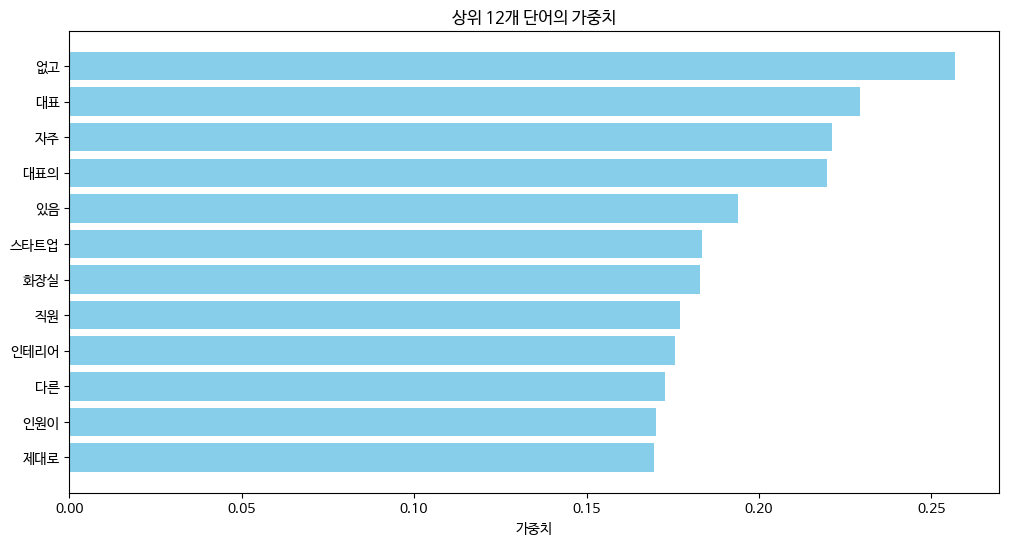

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')



# 중요도가 높은 순으로 정렬된 인덱스 추출
top_n = 12
top_indices = sorted_indices[:top_n]

# 상위 N개 단어와 가중치 추출
top_words = [tfidfvector.get_feature_names_out()[index] for index in top_indices]
top_importances = [importances[index] for index in top_indices]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_importances, color='skyblue')
plt.xlabel('가중치')
plt.title('상위 12개 단어의 가중치')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 순서 뒤집기
plt.show()



In [35]:
import joblib

joblib.dump(ridge_reg.best_estimator_, 'ridge_reg_model.pkl')
joblib.dump(lasso_reg.best_estimator_, 'lasso_reg_model.pkl')

['lasso_reg_model.pkl']

In [ ]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators': [500, 750 1000], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'max_depth' : [4,6,8,10], 'gpu_id':[0], 'tree_method' : ['gpu_hist'], 'predictor':['gpu_predictor']}
xgb_reg = XGBRegressor()
print_best_params(xgb_reg, xgb_params)
xgb_reg.fit(X_train,y_train)

print(xgb_reg.score(X_train,y_train))
print(xgb_reg.score(X_test,y_test))

In [ ]:
joblib.dump(xgb_reg, 'xgb_reg_model.pkl')
xgb_reg_model = joblib.load('ridge_reg_model.pkl')